In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn import svm
from xgboost import XGBClassifier


In [4]:
#Read the data

data_df = pd.read_csv(r"C:\Users\junai\Downloads\creditcard.csv\creditcard.csv")
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- There arw 28 columns of data v1-v28 and another two columns Time and Amount. Class is the output

In [4]:
#Checking the data

data_df.shape 

#2,84,807 rows and 31 columns


(284807, 31)

In [5]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking for missing data

In [5]:
null_df = (data_df.isnull().sum()/ len(data_df)) * 100
missing_df = pd.DataFrame(
    {
        "No_of_missing_values" : data_df.isnull().sum(),
        "Percentage" : null_df
    }
)
missing_df
#Looks like the data is not null for any column

,No_of_missing_values,Percentage
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


- Checking for data imbalance in counts column

In [6]:
class_col = data_df["Class"].value_counts()
class_col

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
# Create class_0 → Series of "Time" values for Class 0 rows.

# class_1 → Series of "Time" values for Class 1 rows.

class_0 = data_df.loc[data_df["Class"] == 0]["Time"]
class_1 = data_df.loc[data_df["Class"] == 1]["Time"]

- Plot


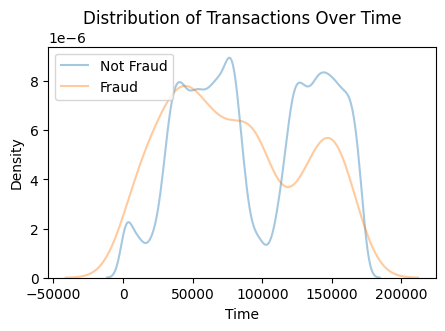

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.kdeplot(class_0, label="Not Fraud", fill=False, alpha=0.4)
sns.kdeplot(class_1, label="Fraud", fill=False, alpha=0.4)

plt.xlabel("Time")
plt.ylabel("Density")
plt.title("Distribution of Transactions Over Time")
plt.legend()
plt.show()


### Feature Correlation


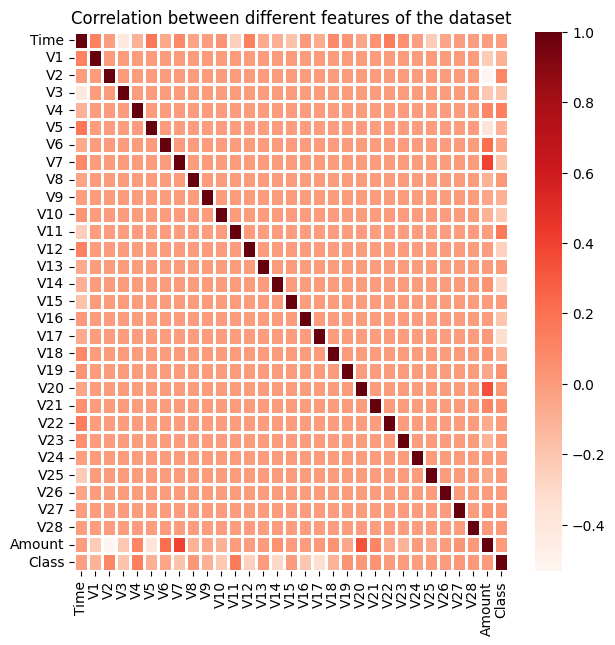

In [9]:
plt.figure(figsize=(7,7))
plt.title("Correlation between different features of the dataset")
corr = data_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, cmap="Reds")
plt.show()

- Mostly there is not much correlation between features except may be for that between v7 and Amount, v20 and amount

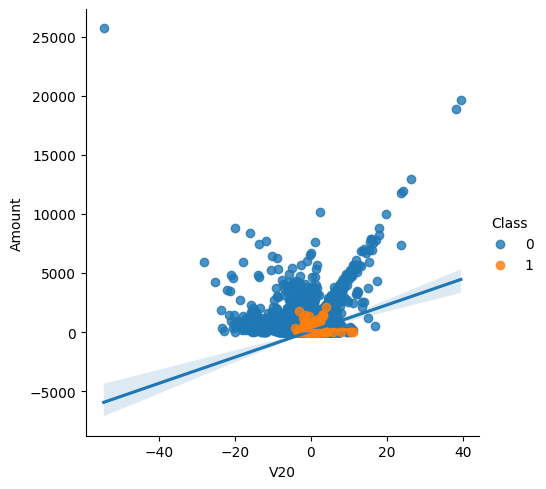

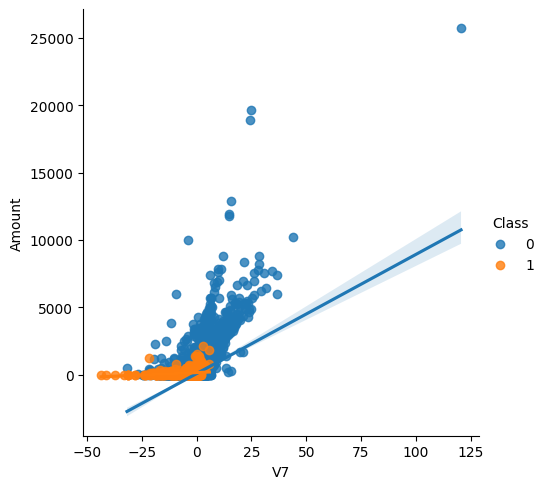

In [20]:
sns.lmplot(x="V20", y="Amount", data=data_df, hue="Class", fit_reg=True)
sns.lmplot(x="V7", y="Amount", data=data_df, hue="Class", fit_reg=True)

## Predictive Models

- Splitting into training, testing and validation sets

In [10]:
y = "Class"
X = ["Time", "V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28", "Amount"]

In [11]:
train_df, test_df = train_test_split(data_df, train_size=0.8, test_size=0.2, random_state=42, shuffle=True)
train_df, valid_df = train_test_split(data_df, train_size=0.8, test_size=  0.2, random_state=42, shuffle=True)

- 1. RANDOM FOREST CLASSIFIER

In [36]:
classifier = RandomForestClassifier(n_jobs=4, random_state=42, n_estimators=100, verbose=False, criterion="gini")

In [39]:
classifier.fit(train_df[X], train_df[y])

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [47]:
y_pred = classifier.predict(valid_df[X])

- We can calculate which features most contribute to the Class prediction

C:\Users\junai\AppData\Local\Temp\ipykernel_13268\3162368755.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels())


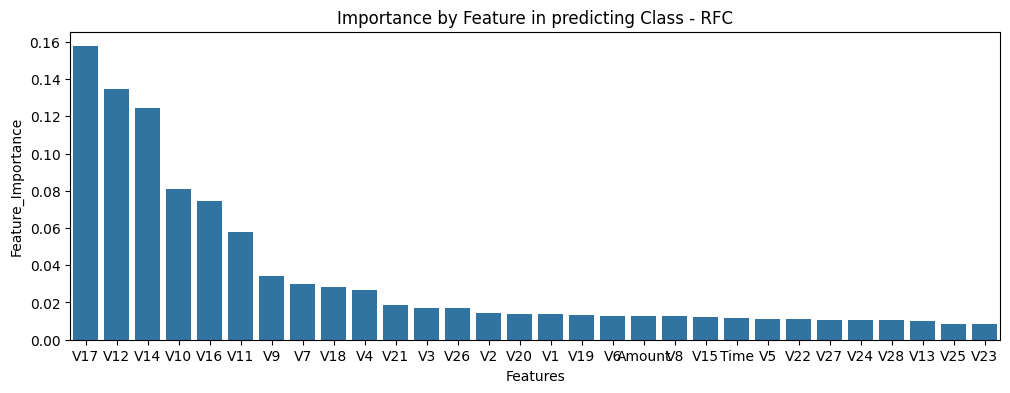

In [46]:
feat_df = pd.DataFrame({
    "Features" : X, "Feature_Importance" : classifier.feature_importances_
})
featImp_df = feat_df.sort_values(by="Feature_Importance", ascending=False)
plt.figure(figsize=(12,4))
plt.title("Importance by Feature in predicting Class - RFC")
s = sns.barplot(x = "Features", y = "Feature_Importance", data = featImp_df)
s.set_xticklabels(s.get_xticklabels())
plt.show()

- How accurate is the model is calculated usind Area under Curve - AUC

In [48]:
roc_auc_score(valid_df[y], y_pred)

0.8826354754056941

#### Accuracy using Random Forest Classifier is 88.2%

### ADABOOST CLASSIFIER


In [12]:
ada_classifier = AdaBoostClassifier(random_state=42, algorithm="SAMME.R", learning_rate=0.8, n_estimators=100)

In [13]:
ada_classifier.fit(train_df[X], train_df[y])

c:\Users\junai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [14]:
y_pred_ada = ada_classifier.predict(valid_df[X])

C:\Users\junai\AppData\Local\Temp\ipykernel_12456\2116044481.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels())


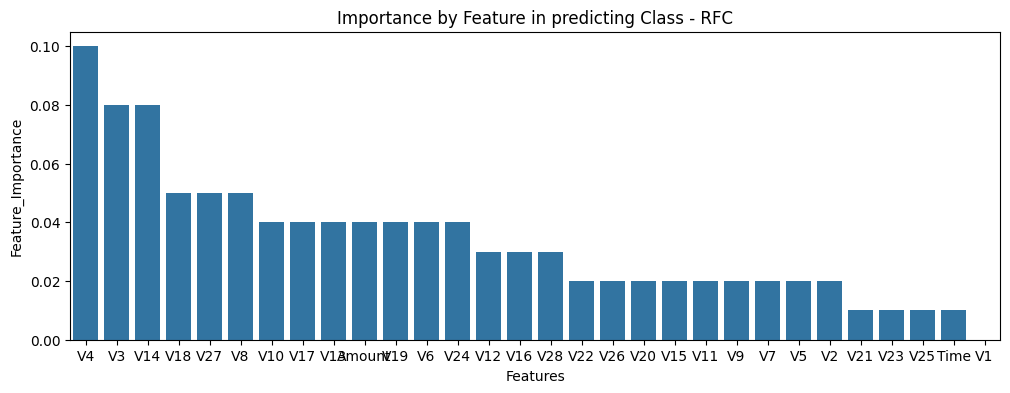

In [15]:
feat_df = pd.DataFrame({
    "Features" : X, "Feature_Importance" : ada_classifier.feature_importances_
})
featImp_df = feat_df.sort_values(by="Feature_Importance", ascending=False)
plt.figure(figsize=(12,4))
plt.title("Importance by Feature in predicting Class - RFC")
s = sns.barplot(x = "Features", y = "Feature_Importance", data = featImp_df)
s.set_xticklabels(s.get_xticklabels())
plt.show()

In [16]:
roc_auc_score(valid_df[y], y_pred_ada)

0.8672678025909294

#### Accuracy with AdaBoost classifier is 86.7%